In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("DelayedFlights.csv", low_memory=False)
print("✅ Dataset Loaded")
print("Shape:", df.shape)   # rows, columns


✅ Dataset Loaded
Shape: (1936758, 30)


In [3]:
# Step 3: Explore dataset
print("\n--- Basic Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head(20))

print("\n--- Columns ---")
print(df.columns)



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25

In [4]:
# Step 4: Reduce dataset size (remove unused/unnecessary columns)
# Keep only important columns
columns_to_keep = [
    'Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime',
    'ArrTime','CRSArrTime','UniqueCarrier','FlightNum','TailNum',
    'ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay',
    'Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled','CancellationCode',
    'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'
]

df = df[columns_to_keep]
print("✅ Reduced dataset shape:", df.shape)


✅ Reduced dataset shape: (1936758, 28)


In [5]:
# Step 5: Memory Optimization
df['FlightNum'] = df['FlightNum'].astype('int32')
df['Distance'] = df['Distance'].astype('int16')
df['Cancelled'] = df['Cancelled'].astype('int8')

print("✅ Optimized memory usage")


✅ Optimized memory usage


In [6]:
# Step 6: Handle missing values
# Fill NA in delay-related columns with 0
delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df[delay_cols] = df[delay_cols].fillna(0)

# Fill NA in cancellation code with 'None'
df['CancellationCode'] = df['CancellationCode'].fillna('None')

print("✅ Missing values handled")


✅ Missing values handled


In [7]:
# Step 7: Feature Engineering
# Convert time columns to datetime-friendly formats
df['DepHour'] = df['CRSDepTime'] // 100   # Scheduled Departure Hour
df['Route'] = df['Origin'] + "-" + df['Dest']

# Example: Map Day of Week
day_map = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
df['DayName'] = df['DayOfWeek'].map(day_map)

print("✅ New features added")


✅ New features added


In [9]:
# Step 8: Save cleaned dataset
df.to_csv("Cleaned_DelayedFlights.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_DelayedFlights.csv'")


✅ Cleaned dataset saved as 'Cleaned_DelayedFlights.csv'


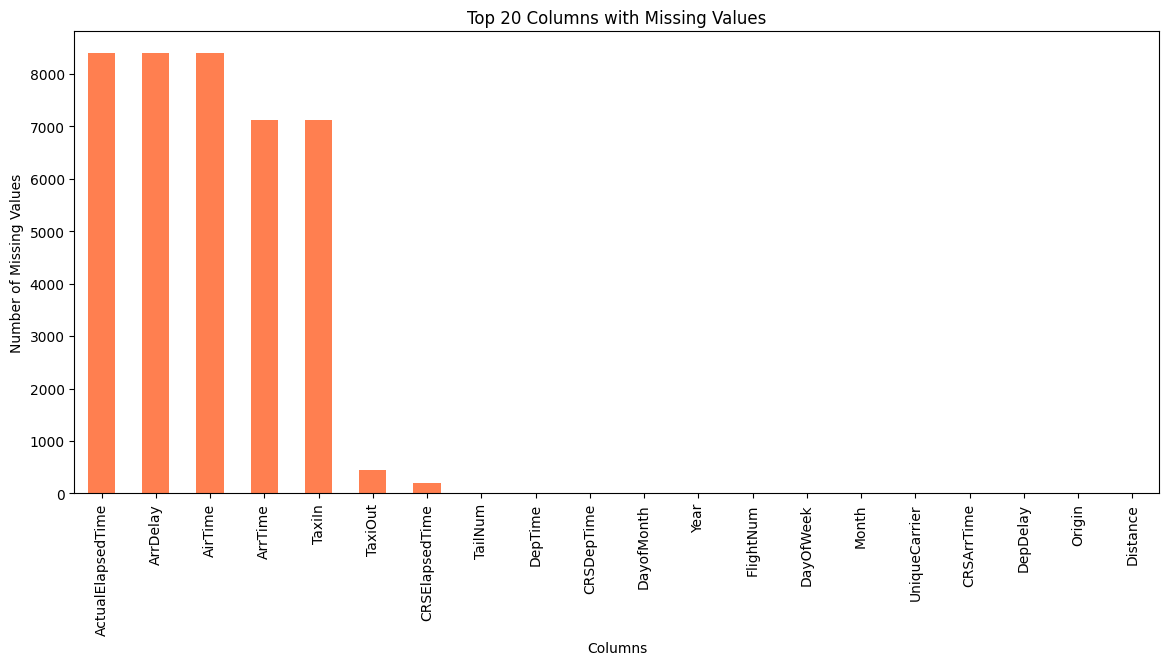

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
df.isnull().sum().sort_values(ascending=False).head(20).plot(kind="bar", color="coral")
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


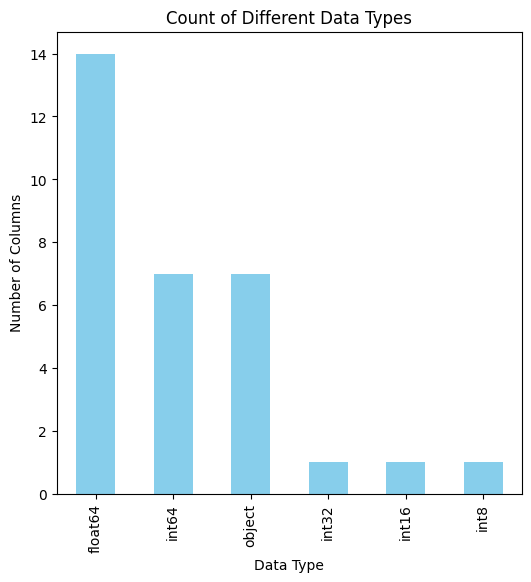

In [11]:
plt.figure(figsize=(6,6))
df.dtypes.value_counts().plot(kind="bar", color="skyblue")
plt.title("Count of Different Data Types")
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.show()



/tmp/ipykernel_10018/3020351067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="viridis")


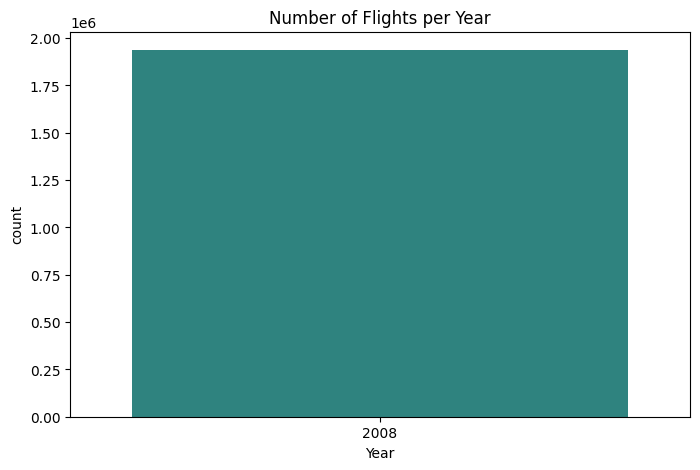

In [13]:
if "Year" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x="Year", data=df, palette="viridis")
    plt.title("Number of Flights per Year")
    plt.show()


/tmp/ipykernel_10018/1498622257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, palette="coolwarm")


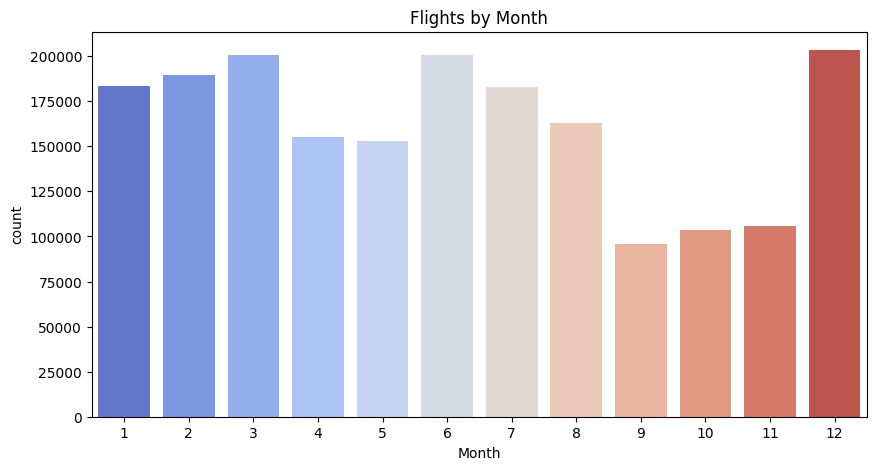

In [14]:
if "Month" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="Month", data=df, palette="coolwarm")
    plt.title("Flights by Month")
    plt.show()


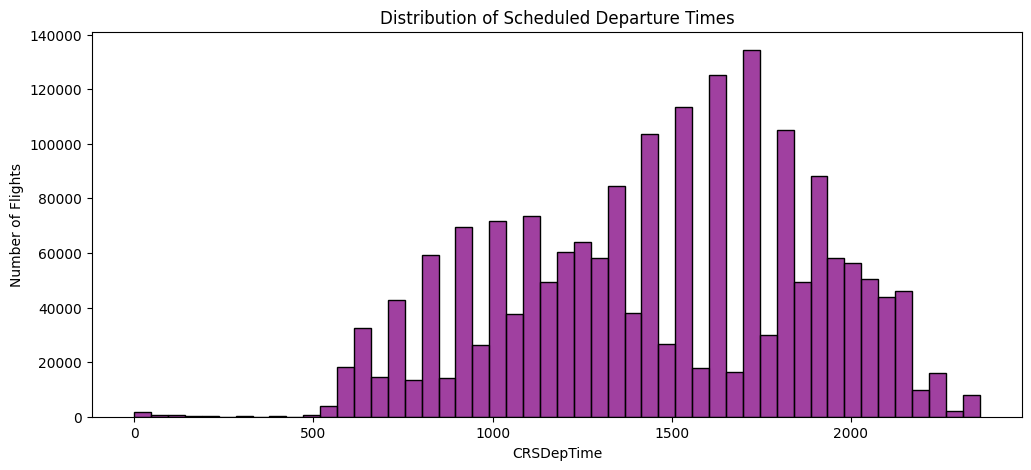

In [15]:
if "CRSDepTime" in df.columns:
    plt.figure(figsize=(12,5))
    sns.histplot(df["CRSDepTime"].dropna(), bins=50, color="purple")
    plt.title("Distribution of Scheduled Departure Times")
    plt.xlabel("CRSDepTime")
    plt.ylabel("Number of Flights")
    plt.show()


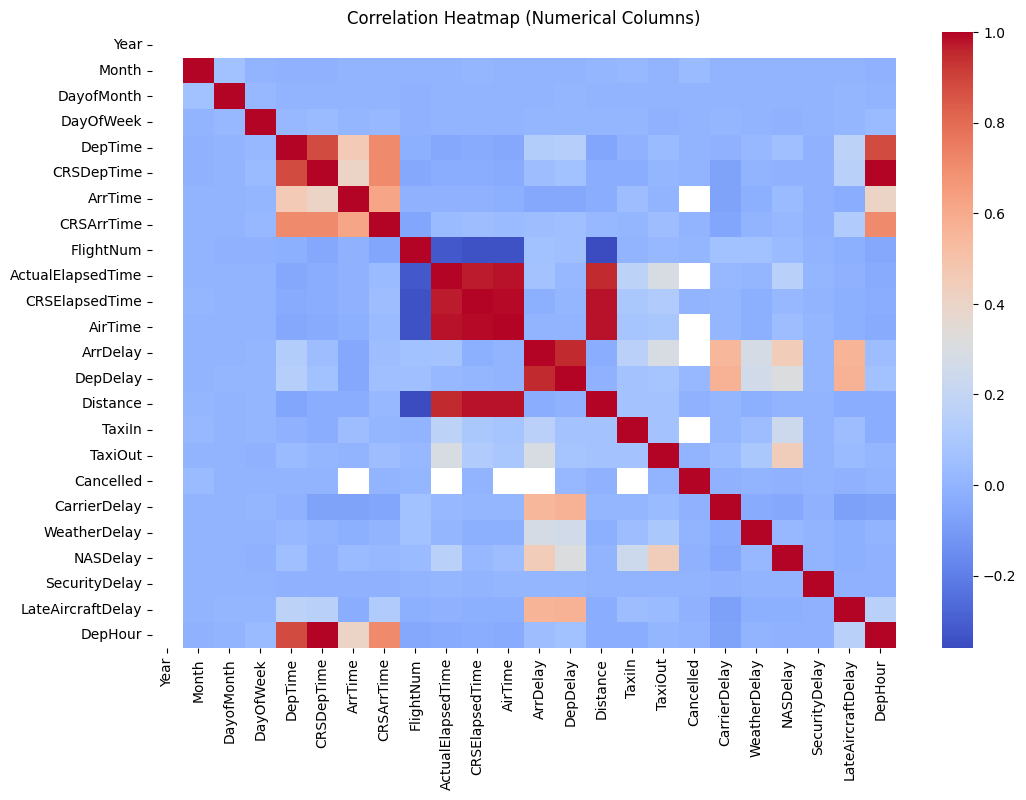

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True).round(2), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()
